In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

%matplotlib inline

In [3]:
df = pd.read_csv('datasets/mlb_2013-2016.csv')
df.head()

,Season,Team,Team Salary,Team Salary (in millions),League,Wins,Losses,Winning %,AB,R,...,INN,TC,PO,A,E,DP,SBPCT,C_WP,FPCT,DER
0,2016,Arizona Diamondbacks,103372186,103.4,NL,69,93,0.426,5665,752,...,13062,6118,4354,1663,101,143,0.643,69,0.983,0.667
1,2016,Atlanta Braves,122438633,122.4,NL,68,93,0.422,5514,649,...,13029,6009,4343,1565,101,134,0.841,83,0.983,0.694
2,2016,Baltimore Orioles,157201852,157.2,AL,89,73,0.549,5524,744,...,12888,5955,4296,1579,80,165,0.651,59,0.987,0.689
3,2016,Boston Red Sox,215316336,215.3,AL,93,69,0.574,5670,878,...,12957,5821,4319,1427,75,139,0.641,52,0.987,0.695
4,2016,Chicago Cubs,182235728,182.2,NL,103,58,0.640,5503,808,...,13137,6115,4379,1635,101,116,0.778,80,0.983,0.731


In [4]:
import seaborn as sns

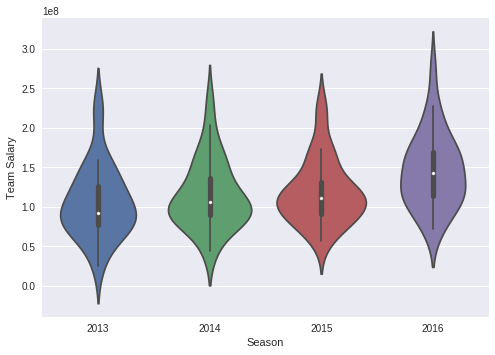

In [5]:
# df.plot(kind='scatter', x='Season', y='Team Salary')
sns.violinplot(x='Season', y='Team Salary', data=df)

In [6]:
df.columns

Index(['Season', 'Team', 'Team Salary', 'Team Salary (in millions)', 'League',
       'Wins', 'Losses', 'Winning %', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS', 'ERA', 'SV', 'SVO',
       'IP', 'Hit Allowed', 'Runs Allowed', 'ER Allowed', 'HR Allowed',
       'BB Allowed', 'SO Pitched', 'AVG Allowed', 'WHIP', 'INN', 'TC', 'PO',
       'A', 'E', 'DP', 'SBPCT', 'C_WP', 'FPCT', 'DER'],
      dtype='object')

In [7]:
# Let's predict 'Winning %' from the rest of the columns.
cols = list(df.columns)
cols.remove('Season')
cols.remove('Team')
cols.remove('Team Salary (in millions)')
cols.remove('League')
cols.remove('Wins')
cols.remove('Losses')

feat_cols = list(set(cols) - set(['Winning %']))
y_cols = ['Winning %']

In [8]:
feat_cols

['Team Salary',
 '3B',
 'INN',
 'C_WP',
 'WHIP',
 'HR',
 'OBP',
 'AVG',
 'SLG',
 'AVG Allowed',
 'BB Allowed',
 'TC',
 'E',
 'AB',
 'HR Allowed',
 'H',
 'CS',
 'SVO',
 'SO Pitched',
 'SBPCT',
 'SV',
 'IP',
 'R',
 '2B',
 'DP',
 'Hit Allowed',
 'ERA',
 'ER Allowed',
 'BB',
 'DER',
 'SO',
 'Runs Allowed',
 'SB',
 'RBI',
 'OPS',
 'FPCT',
 'PO',
 'A']

In [18]:
import theano.tensor as tt
with pm.Model() as model:
    weights = pm.Normal('weights', mu=0, sd=100**2, shape=(len(feat_cols),))
    perc_losses = tt.dot(weights, df[feat_cols].T)
    alpha = 1
    beta = 1 / perc_losses
    like = pm.Beta('likelihood', alpha=alpha, beta=beta, observed=df[y_cols])

In [ ]:
with model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...

Average ELBO = -inf:  22%|██▏       | 44157/200000 [00:08<00:28, 5385.83it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab5eb64f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fab4cc356a0>]], dtype=object)

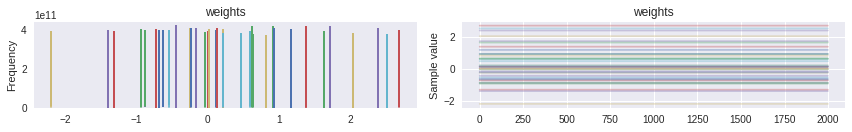

In [17]:
pm.traceplot(trace)